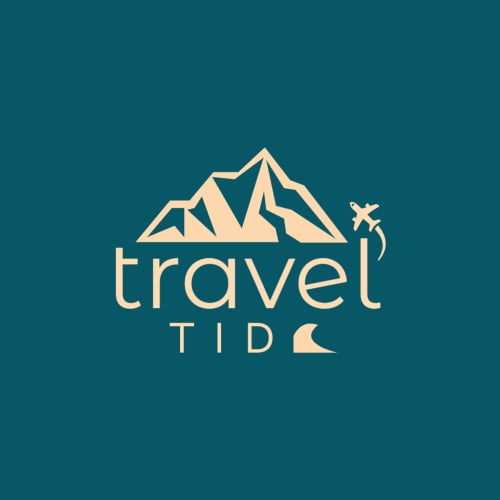

#**Travel Tide**  **✈** **Optimizing Customer Engagement via Personalized Perks**


#  **Introduction;**
 ## "Enhancing Customer Loyalty Through Data-Driven Rewards"

**Objective:**
        This project focuses on identifying customer segments based on their travel behaviors and assigning tailored rewards to enhance satisfaction and engagement.

**Purpose:**
      By offering personalized perks, Travel Tide aims to increase customer loyalty,improve booking rates,and attract more frequent travelers.



## **Methodology**


**High-Level Takeaways**

"Key Insights from Behavioral Data"

**Customer Segments:**
  
  Using Travel Tide's historical booking and session data, i identified Six key customer groups.

**Booking Behavior:**

 Each segment has unique travel patterns, such as frequency of travel, trip cancellation rates, average spending on bookings etc.

 **Reward Perks:**
  
   Tailored perks were created for each segment to drive engagement and foster long-term relationships with customers.




## **Identified Customer Segments**


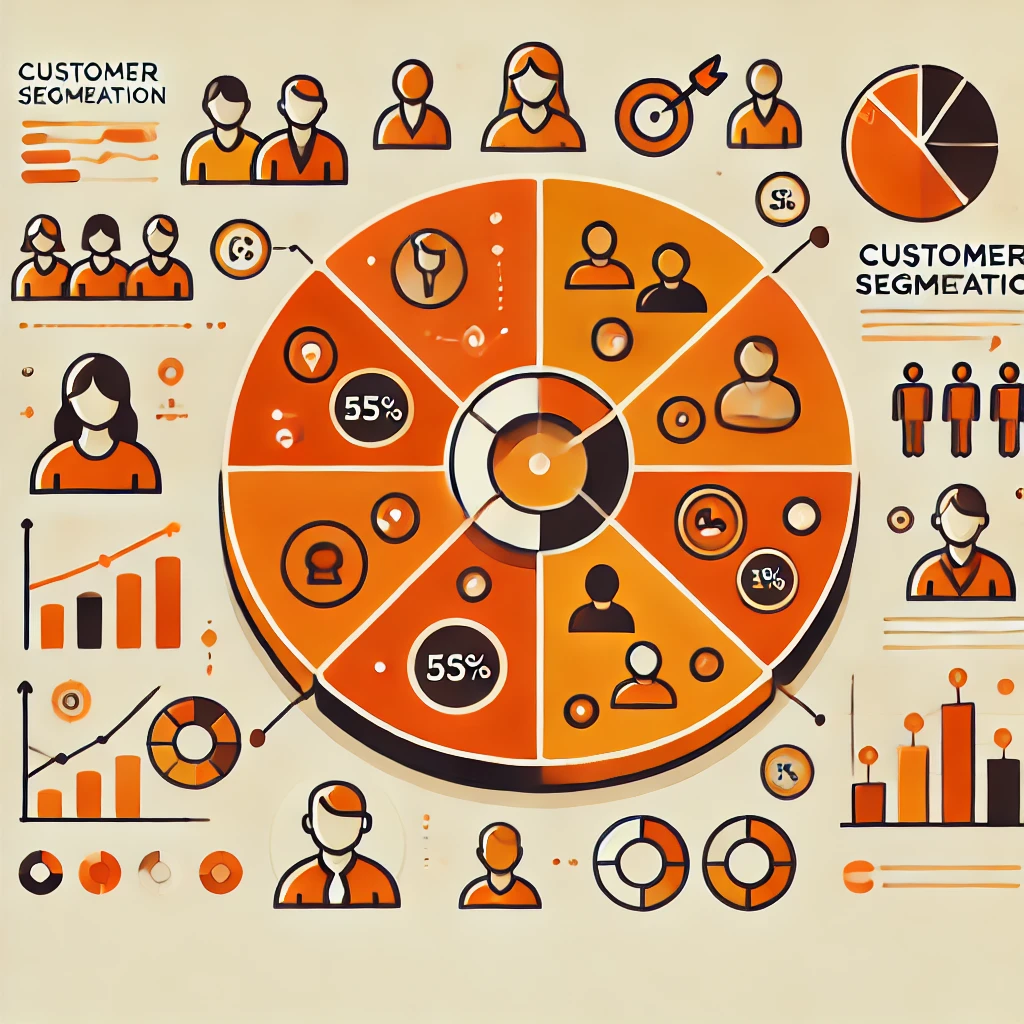



**"Customer Segmentation Based on

Travel Preferences"**

**Family-Oriented Travelers:**
  
  Characterized by longer stays and multiple rooms. Often book trips for family vacations.

**Assigned Perk:**

 Free Checked Bag (catering to family needs).

**Assigned Perk:**
       
Free Checked Bag** (catering to family needs).


**High-Spending Travelers**
      Tend to spend significantly on both flights and hotels.

**Assigned Perk:**
      Free Hotel Meal (adding value to their luxury experience).

**Budget Travelers:**
      Actively look for discounts and prefer affordable bookings.

**Assigned Perk:**
      Exclusive Discounts (appealing to their cost-conscious nature).

**Frequent Travelers:**
      Travel frequently with a low trip cancellation rate.

**Assigned Perk:**
      1 Night Free Hotel with Flight (rewarding loyalty and encouraging repeat bookings).

**Spontaneous Travelers:**
      Make bookings close to the departure date, with low cancellations.

**Assigned Perk:**
      No Cancellation Fees (encouraging risk-free bookings for last-minute planners).


**Moderate Travelers:**
      Moderate Travelers typically book more than three trips annually.

These travelers often balance personal and work trips and are likely to seek convenience during their journeys.

**Assigned Perk:**
  
  This perk is especially appealing to those who seek comfort and time-saving advantages without needing luxury benefits.





#**Perks Assignment Strategy**

**"How Tailored Perks Drive Engagement"**

We strategically aligned perks with the behavioral patterns of each customer group.
Example:

**Family Travelers:**

Benefit from perks like free checked bags, which accommodate family needs.

**Budget Travelers:**

Attracted by exclusive discounts, improving retention and conversion.

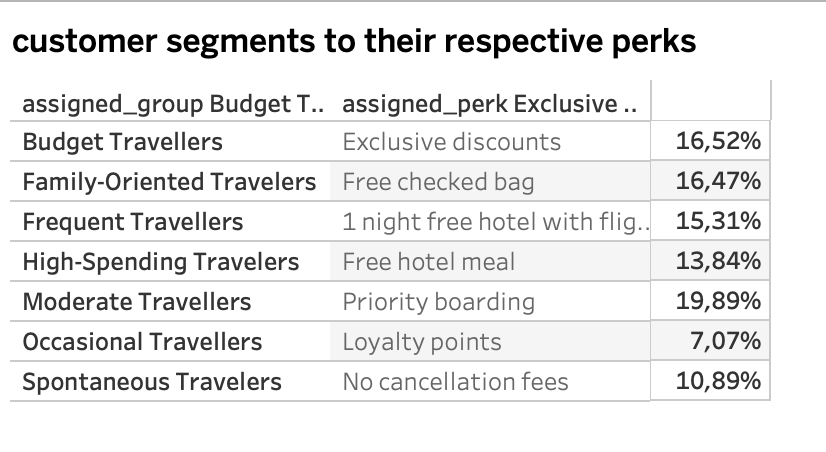

# Links;
[Tableau Dashboard](https://public.tableau.com/app/profile/florence.kirmes/viz/TravelTidefinalDashboard/Dashboard1)


[Presantation slides & video](https://drive.google.com/file/d/1xcBlrXkWztZs5c0sfRJxj0nhfuhCpjIW/view?usp=sharing)

# Customer Group Distribution:
  Percentage of users in each segment.



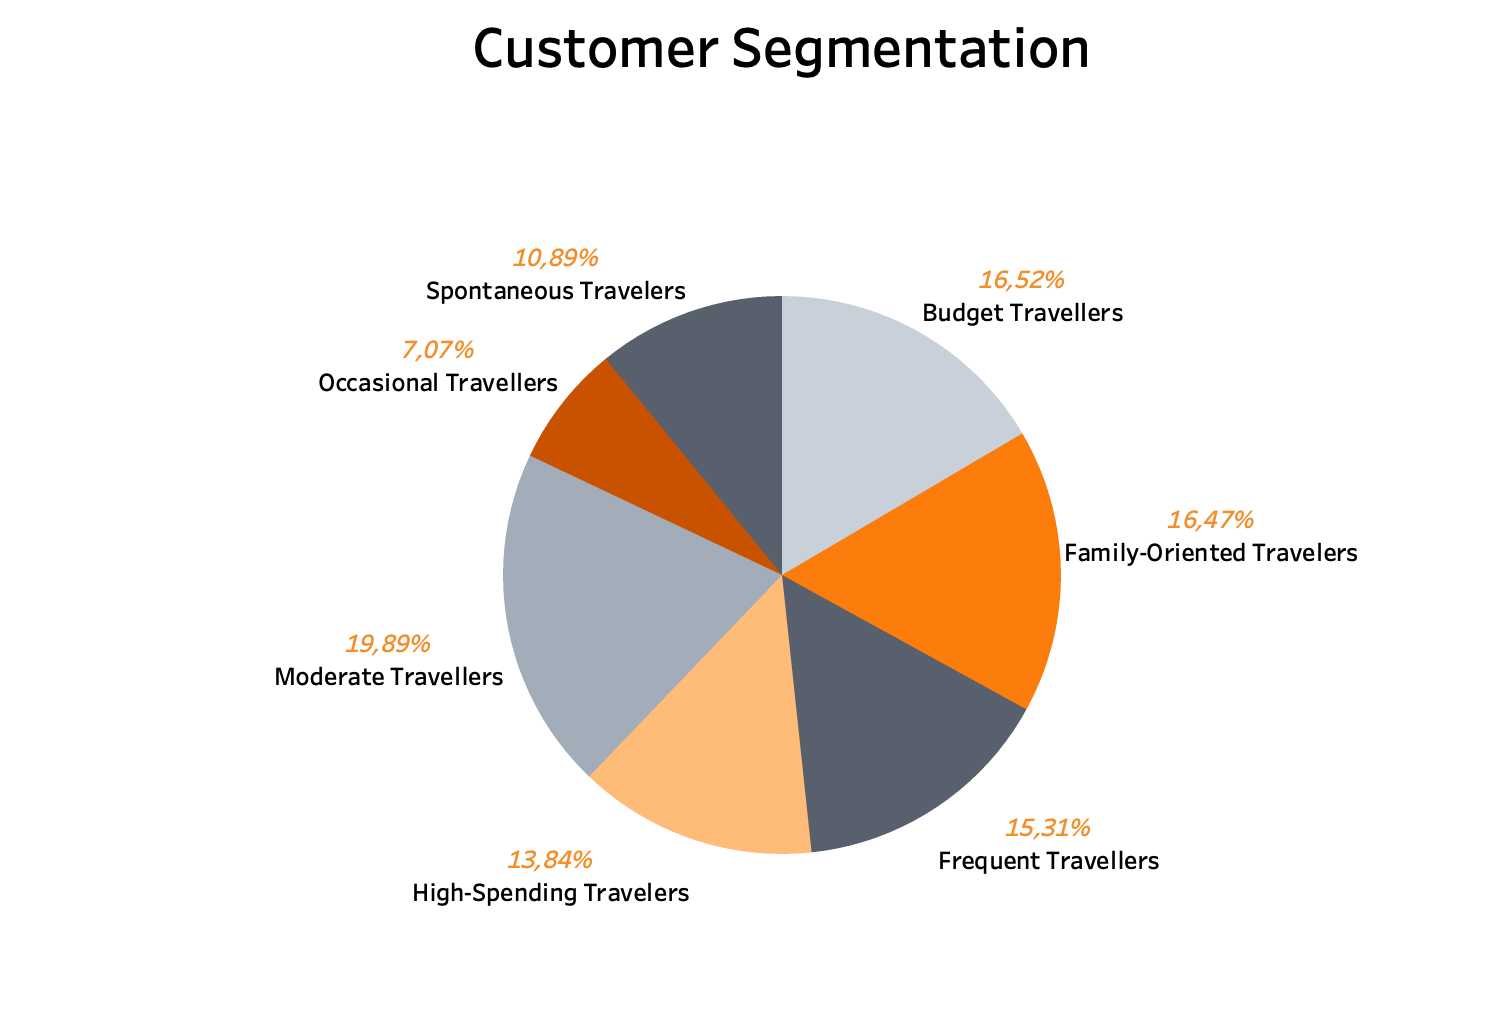

# **Booking Behavior**

Conversion rates, cancellation rates, and average booking prices.



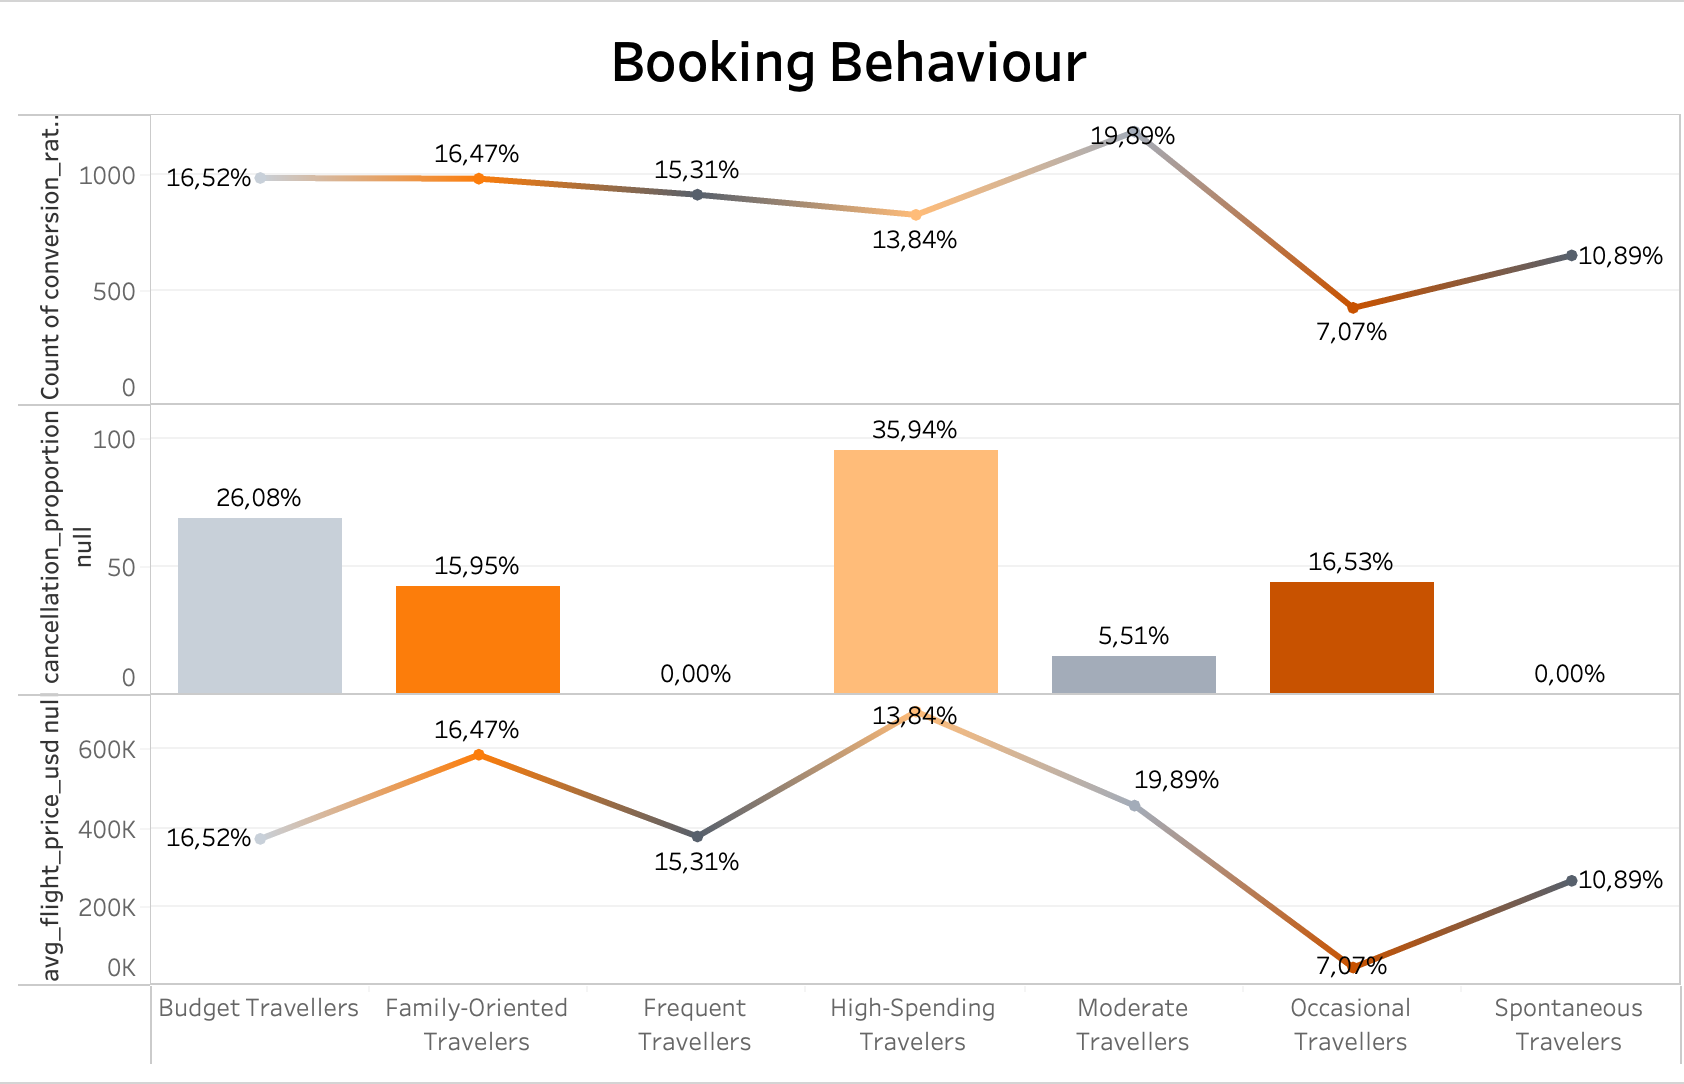

# **Geographical map**

Distribution of users based on home countries or cities.


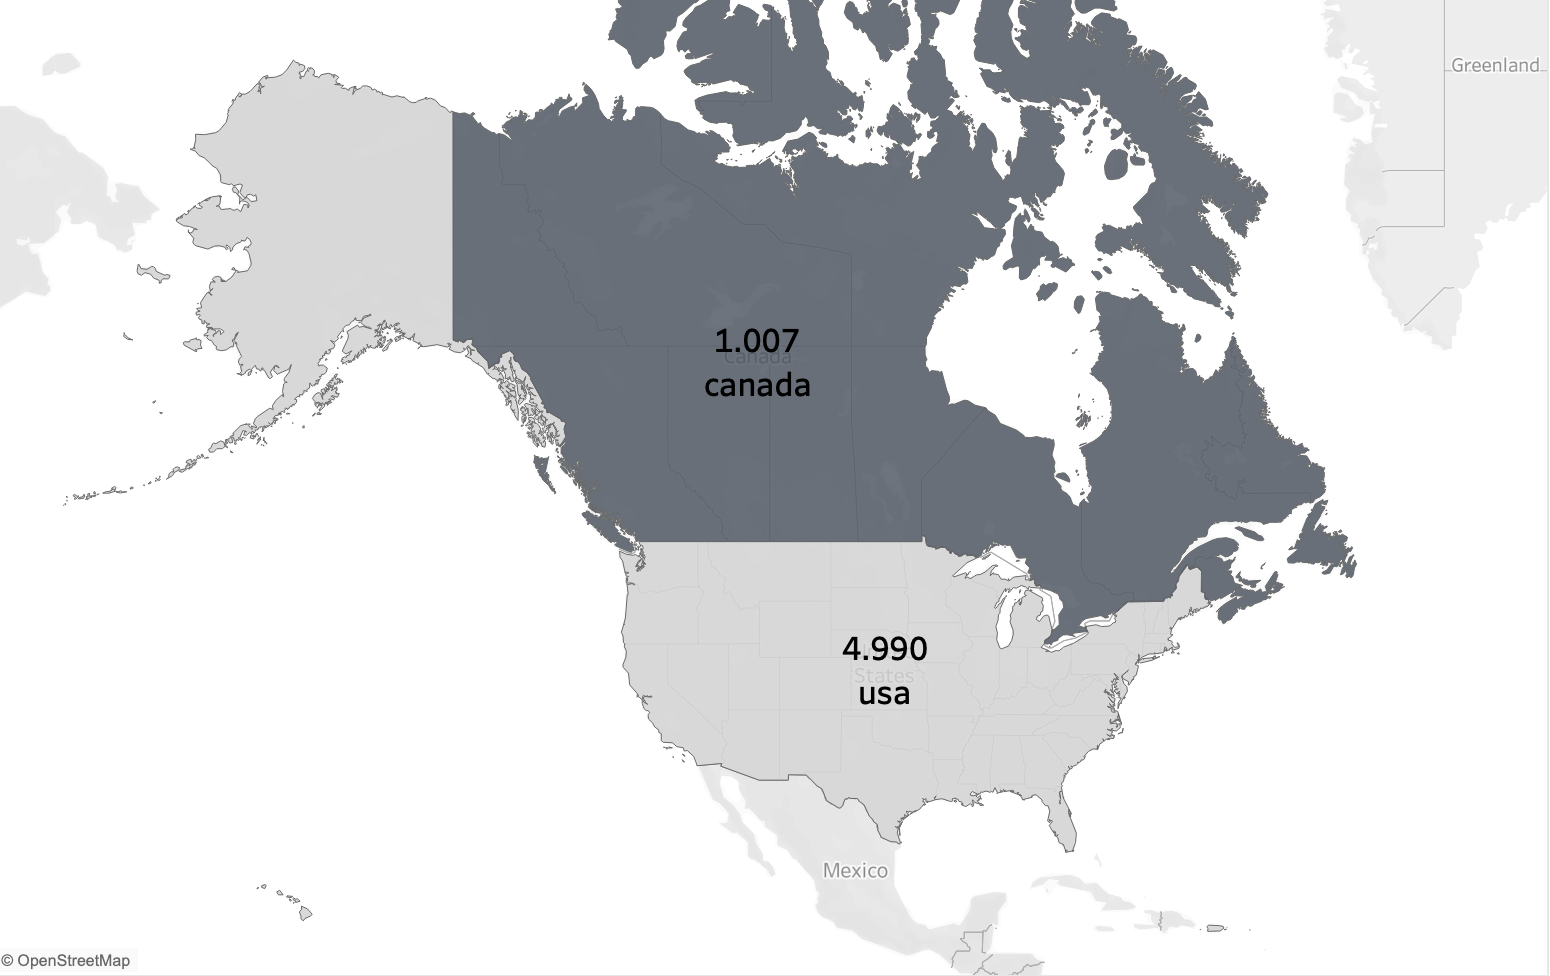

## Next Steps for Travel Tide: 💪


##**Actionable Steps to Enhance Services**

**1. Launch the Rewards Program:
Implement the tailored perks based on the customer segmentation analysis.**

**2. Track User Engagement:
Monitor how each group responds to their assigned perks.**

**3. Adjust the Program:
Fine-tune perks over time based on customer feedback and changing behaviors.**

**4. Expand Marketing:
Use insights from the data to target high-potential segments (e.g., frequent travelers, high spenders) with customized marketing campaigns.**


# **Conclusion**

**A Data-Driven Approach to Customer Retention"**

**Key Point:**

By leveraging customer data, Travel Tide can now offer personalized, value-driven perks that will improve user satisfaction, foster loyalty, and increase overall revenue.
Looking Forward:
This rewards program is just the beginning. We’ll continue analyzing customer behaviors to offer even more personalized services in the future.

## **SQL code**
Below is the final code for the cohort used the analysis

```
-- Step 1: Filtered Sessions on Elena's suggested timeframe > Jan 4 2023 & Ids of Users with > 7 Sessions
WITH sessions_2023 AS (
  
  SELECT user_id
  FROM sessions
  WHERE session_start > '2023-01-04'
  GROUP BY user_id
  HAVING COUNT(session_id) > 7
),
-- Step 2: Aggregated and Combined Data
aggregated_data AS (
    SELECT
        s.user_id,
        -- total number of users sessions
        COUNT(DISTINCT s.session_id) AS num_sessions,
        --average  session duration in minutes
        ROUND(AVG(EXTRACT(MINUTE FROM (session_end - session_start))),2) AS avg_session_duration_minute,
        --average number of clicks across all browsing sessions
        ROUND(AVG(page_clicks),2) AS avg_page_clicks,
        -- total number of trips booked
        COUNT(DISTINCT CASE WHEN NOT cancellation THEN s.trip_id END) AS total_trips,
        -- dividing the number of booked trips (if no cancellation) by total number of browsing sessions = conversion rate
        ROUND(CASE WHEN COUNT(DISTINCT s.session_id) > 0 THEN
              1.0 * COUNT(DISTINCT CASE WHEN NOT cancellation THEN s.trip_id END) / COUNT(DISTINCT s.session_id)
              ELSE 0 END ,2) AS conversion_rate,
        -- the proportion of booked trips that were cancelled (returns NULL for users who didn't book any trip to avoid division by zero error)
        ROUND(1.0 * COUNT(DISTINCT CASE WHEN cancellation THEN s.trip_id END) /
              NULLIF(COUNT(DISTINCT CASE WHEN NOT cancellation THEN s.trip_id END), 0) ,2) AS cancellation_proportion,
        --Average distance flown in KM
        ROUND(AVG(haversine_distance(home_airport_lat, home_airport_lon, destination_airport_lat, destination_airport_lon))) AS avg_distance_flown,
        -- the average time gap between booking and the actual departure
        -- calculating the booking to departure time gap in seconds and then days by dividing by 86400
        ROUND(AVG(EXTRACT(EPOCH FROM (f.departure_time - s.session_end)) / 86400) ,2) AS avg_booking_departure_gap_days_flights,
        -- As some users only booked hotels, I add another calculation considering hotel check_in_time
        ROUND(AVG(EXTRACT(EPOCH FROM (h.check_in_time - s.session_end)) / 86400) ,2) AS avg_booking_departure_gap_days_hotels,
        -- total number of flights booked by users
        COUNT(DISTINCT CASE WHEN flight_booked THEN s.trip_id END) AS total_flights_booked,
        -- average flight price in USD
        ROUND(AVG(base_fare_usd),2) AS avg_flight_price_usd,
        -- the average discount amount availed for bookings
        ROUND(AVG(flight_discount_amount),2) AS avg_flight_discount_amount,
        -- proportion of flight bookings where users availed discounts
        ROUND(SUM(CASE WHEN flight_discount THEN 1 ELSE 0 END) :: NUMERIC / COUNT(*),2) AS discounted_flight_proportion,
        -- average number of seats booked in flight
        ROUND(AVG(seats),2) AS avg_flight_seats,
        -- average number of checked bags in flights
        ROUND(AVG(checked_bags),2) AS avg_checked_bags,
        -- total number of hotels booked by users
        COUNT(DISTINCT CASE WHEN hotel_booked THEN s.trip_id END) AS total_hotels_booked,
        -- average hotel price in USD
        ROUND(AVG(hotel_per_room_usd * nights * rooms),2) AS avg_hotel_price_usd,
        -- the average discount amount availed for hotel bookings
        ROUND(AVG(hotel_discount_amount),2) AS avg_hotel_discount_amount,
        -- proportion of hotel bookings where users availed discounts
        ROUND(SUM(CASE WHEN hotel_discount THEN 1 ELSE 0 END) :: NUMERIC / COUNT(*),2) AS discounted_hotel_proportion,
        -- average number of rooms booked in hotels
        ROUND(AVG(rooms),2) AS avg_hotel_rooms,
        -- average stay duration in hotel in days (to understand users' preferences for shorter or longer stays)
        ROUND(AVG(EXTRACT(DAY FROM (check_out_time - check_in_time))),2) AS avg_hotel_stay_duration_day,
       -- users who booked two-way flights (round trips proportion)
        ROUND(CASE WHEN COUNT(DISTINCT CASE WHEN flight_booked THEN s.trip_id END) > 0 THEN
              1.0 * COUNT(DISTINCT CASE WHEN return_flight_booked THEN s.trip_id END) /
              COUNT(DISTINCT CASE WHEN flight_booked THEN s.trip_id END) ELSE 0 END ,2) AS round_trips_proportion,
        --Weekend trips proportion, to distinguish weekend gateway travelers,
        --when the departure time is on Fridays or Saturdays, and return_time is on Sundays or Mondays
       -- and the duration of the trip is less than three days */
        ROUND(CASE WHEN COUNT(DISTINCT CASE WHEN NOT cancellation THEN s.trip_id END) > 0 THEN
              1.0 * COUNT(DISTINCT CASE WHEN EXTRACT(DOW FROM departure_time) IN (5,6)
                  AND return_flight_booked IS TRUE
                  AND EXTRACT(DAY FROM return_time) IN (0,1)
                  AND EXTRACT(DAY FROM (return_time - departure_time)) < 3
                  THEN f.trip_id
                  ELSE NULL END) / COUNT(DISTINCT CASE WHEN NOT cancellation THEN s.trip_id END) ELSE 0 END ,2) AS weekend_trip_proportion
    FROM
        sessions AS s
    LEFT JOIN
        flights AS f ON s.trip_id = f.trip_id
    LEFT JOIN
        hotels AS h ON s.trip_id = h.trip_id
    LEFT JOIN
        users AS u ON s.user_id = u.user_id
    WHERE
        s.user_id IN (SELECT user_id FROM sessions_2023)
    GROUP BY
        s.user_id
),
-- Step 3: Customer Segmentation
customer_groups AS (
    SELECT
        ad.user_id,
        CASE
            -- Family Vacationers
            WHEN ad.avg_hotel_rooms > 1 AND ad.avg_hotel_stay_duration_day > 3 THEN 'Family-Oriented Travelers'
            -- High-Spending Travelers
            WHEN ad.avg_flight_price_usd >= 1500 OR ad.avg_hotel_price_usd >= 1000 THEN 'High-Spending Travelers'
            -- Budget-Conscious Travelers
            WHEN ad.discounted_flight_proportion >= 0.3 OR ad.discounted_hotel_proportion >= 0.3 THEN 'Budget Travellers'
            -- Frequent Travellers
            WHEN ad.total_trips >= 4 AND ad.cancellation_proportion < 0.1 THEN 'Frequent Travellers'
            -- Spontaneous Travelers
            WHEN ad.avg_booking_departure_gap_days_flights <= 7 AND ad.cancellation_proportion < 0.1 THEN 'Spontaneous Travelers'
            -- Moderate Travellers
            WHEN ad.total_trips > 3 OR ad.cancellation_proportion < 0.1 THEN 'Moderate Travellers'
            -- Default Perk if no specific criteria met
            ELSE 'Occasional Travellers'
        END AS assigned_group
    FROM
        aggregated_data AS ad
),
-- Step 4: Assign Perks
perks_assignment AS (
    SELECT
        cg.user_id,
        cg.assigned_group,
        CASE
            WHEN cg.assigned_group = 'Family-Oriented Travelers' THEN 'Free checked bag'
            WHEN cg.assigned_group = 'High-Spending Travelers' THEN 'Free hotel meal'
            WHEN cg.assigned_group = 'Budget Travellers' THEN 'Exclusive discounts'
            WHEN cg.assigned_group = 'Frequent Travellers' THEN '1 night free hotel with flight'
            WHEN cg.assigned_group = 'Spontaneous Travelers' THEN 'No cancellation fees'
            WHEN cg.assigned_group = 'Moderate Travellers' THEN 'Priority boarding'
            ELSE 'Loyalty points'
        END AS assigned_perk
   FROM
        customer_groups AS cg
)
-- Step 5: Combine user, session, flights, hotel, groups and perks data to create a comprehensive dataset.
SELECT
    u.user_id,
    u.gender,
    CASE
        WHEN DATE_PART('year', AGE(u.birthdate)) BETWEEN 18 AND 24 THEN '18-24'
        WHEN DATE_PART('year', AGE(u.birthdate)) BETWEEN 25 AND 34 THEN '25-34'
        WHEN DATE_PART('year', AGE(u.birthdate)) BETWEEN 35 AND 44 THEN '35-44'
        WHEN DATE_PART('year', AGE(u.birthdate)) BETWEEN 45 AND 54 THEN '45-54'
        WHEN DATE_PART('year', AGE(u.birthdate)) BETWEEN 55 AND 64 THEN '55-64'
        WHEN DATE_PART('year', AGE(u.birthdate)) >= 65 THEN '65+'
    END AS age_group,
    u.married,
    u.has_children,
    u.home_country,
    u.home_city,
    u.sign_up_date,
    -- browsing sessions info
    ad.num_sessions,
    ad.avg_session_duration_minute,
    ad.avg_page_clicks,
    -- booking behaviour
    ad.total_trips,
    ad.conversion_rate,
    ad.weekend_trip_proportion,
    ad.cancellation_proportion,
    ad.avg_booking_departure_gap_days_flights,
    ad.avg_booking_departure_gap_days_hotels,
    -- booked flights info
    ad.round_trips_proportion,
    ad.avg_flight_price_usd,
    ad.avg_flight_discount_amount,
    ad.discounted_flight_proportion,
    ad.avg_flight_seats,
    ad.avg_checked_bags,
    ad.avg_distance_flown,
    -- booked hotels info
    ad.total_hotels_booked,
    ad.avg_hotel_price_usd,
    ad.avg_hotel_discount_amount,
    ad.discounted_hotel_proportion,
    ad.avg_hotel_rooms,
    ad.avg_hotel_stay_duration_day,
    -- Info Customer groups
    pa.assigned_group,
    -- Info perks assignment
    pa.assigned_perk
FROM
    users AS u
JOIN
    aggregated_data AS ad ON u.user_id = ad.user_id
JOIN
    perks_assignment AS pa ON u.user_id = pa.user_id;
```
